In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

## Reconstruction Function

In [2]:
def reconstructPhase(sv, tau, n, density=1):
    '''
    reconstructPhase()
        samples state vector 'sv' at delay tau, with dimension n
    '''
    state = []
    for _ in range(n): state.append([])
    
    for i in range(0, len(sv)-(n*tau), density):
        for dim in range(n):
            state[dim].append(sv[i+(dim*tau)])
            
    return state

## Lorenz Oscillator

In [3]:
# define parameters
r = 28
b = 8/3
sigma = 10

# define derivatives
def dx(x,y,z):
    return sigma*(y-x)
def dy(x,y,z):
    return x*(r-z)-y
def dz(x,y,z):
    return x*y - b*z
def derivatives(t, X):
    return [dx(X[0],X[1],X[2]), dy(X[0],X[1],X[2]), dz(X[0],X[1],X[2])]

# integration parameters
T = 500 #time to integrate up to
y0 = [1,1,1]
t = np.linspace(1,T,100*T)

# integrate
Y = scipy.integrate.odeint(derivatives, y0=y0, t=t, tfirst=True)

Text(0, 0.5, 'z')

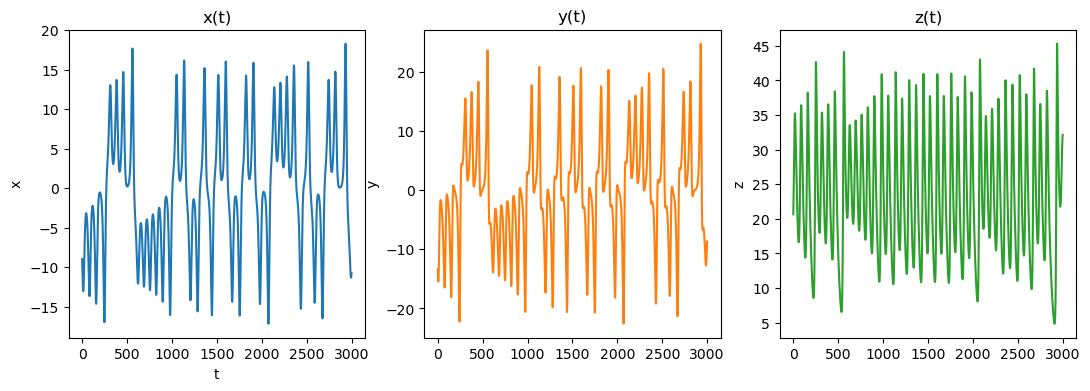

In [4]:
%matplotlib inline

xout = Y[:,0]
yout = Y[:,1]
zout = Y[:,2]

fig, axs = plt.subplots(1,3, figsize=(13,4))

start = 10000
end = 13000

axs[0].plot(xout[start:end], c='tab:blue')
axs[1].plot(yout[start:end], c='tab:orange')
axs[2].plot(zout[start:end], c='tab:green')

axs[0].set_title('x(t)')
axs[1].set_title('y(t)')
axs[2].set_title('z(t)')

axs[0].set_xlabel('t')
axs[0].set_ylabel('x')
axs[1].set_ylabel('y')
axs[2].set_ylabel('z')

<Figure size 640x480 with 0 Axes>

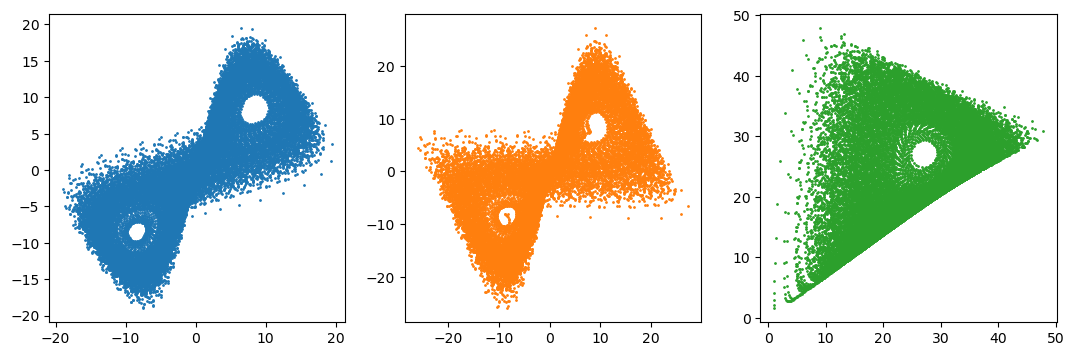

In [6]:
%matplotlib inline

x = Y[:,0]
y = Y[:,1]
z = Y[:,2]

fig = plt.figure()

tau = 14 # in units of time steps
sx = reconstructPhase(x, tau, 3, density=2)
sy = reconstructPhase(y, tau, 3, density=2)
sz = reconstructPhase(z, tau, 3, density=2)

fig, axs = plt.subplots(1,3, figsize=(13,4))
axs[0].scatter(sx[0], sx[1], s=1, c='tab:blue')
axs[1].scatter(sy[0], sy[1], s=1, c='tab:orange')
axs[2].scatter(sz[0], sz[1], s=1, c='tab:green')

Text(0.5, 0.92, '3D Reconstruction')

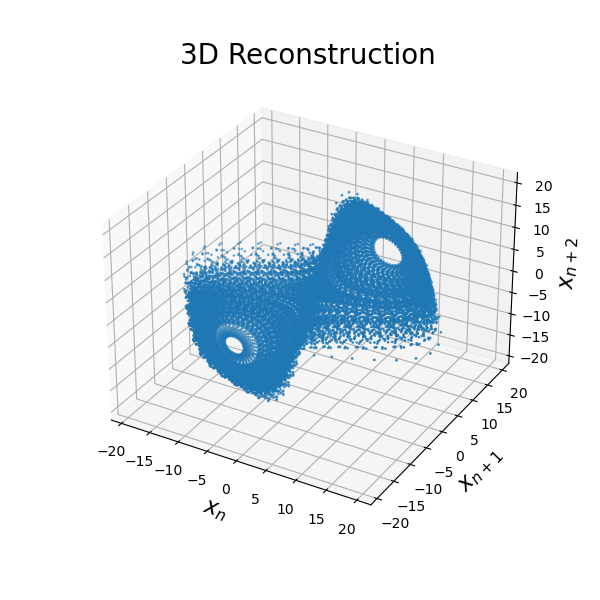

In [7]:
%matplotlib widget

data = sx

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(data[0], data[1], data[2], s=1)

ax.set_xlabel(r'$x_n$', fontsize=16)
ax.set_ylabel(r'$x_{n+1}$', fontsize=16)
ax.set_zlabel(r'$x_{n+2}$', fontsize=16)
ax.set_title('3D Reconstruction', fontsize=20)